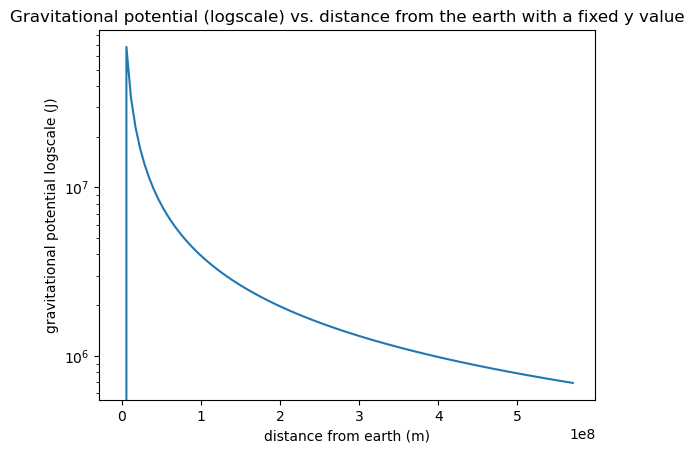

In [1]:
#Part 1: Gravitational Potential Of the Earth
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#defining constants
G = 6.67*10**(-11) #m^3*kg/s
distancemoon = 3.8*10**8 #m
distance = 1.5*distancemoon #m, the distance at which we will be graphing
earthm = 5.9*10**24 #kg
moonm = 7.3*10**22 #kg
#defining phi with five inputs
def phi(M, xm, ym, x, y):
    dist = (x-xm)**2+(y-ym)**2
    if dist == 0:
        phi = 0
        return phi
    else:
        phi = -G*M/(np.sqrt(dist))
        return phi

vphi = np.vectorize(phi)
xvals = np.linspace(0, distance, 100)
grav1 = vphi(earthm,0,0,xvals, 0)
figfixed, axfixed = plt.subplots()
axfixed.plot(xvals,abs(grav1))
plt.yscale('log');
axfixed.set_xlabel('distance from earth (m)')
axfixed.set_ylabel('gravitational potential logscale (J)')
axfixed.set_title('Gravitational potential (logscale) vs. distance from the earth with a fixed y value')
plt.savefig('1D Grav potential of the earth')

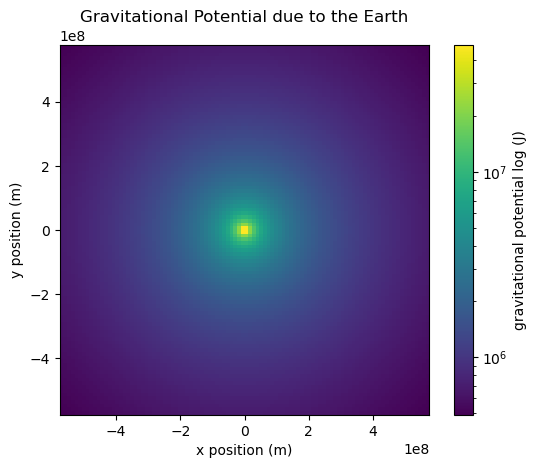

In [6]:
#colormesh plot of earth's gravitational potential
import matplotlib.colors as colors
figmesh, axmesh = plt.subplots()
xvals = np.linspace(-distance, distance,100)
yvals = xvals.copy()
xgrid1, ygrid1 = np.meshgrid(xvals,yvals)
gravmesh = vphi(earthm,0,0,xgrid1, ygrid1)
colors = axmesh.pcolormesh(xgrid1,ygrid1,abs(gravmesh), norm = 'log')
axmesh.set_aspect('equal')
cbar = figmesh.colorbar(colors)
axmesh.set_xlabel('x position (m)')
axmesh.set_ylabel('y position (m)')
axmesh.set_title('Gravitational Potential due to the Earth')
cbar.set_label('gravitational potential log (J)')
plt.savefig('Grav potential w only earth')

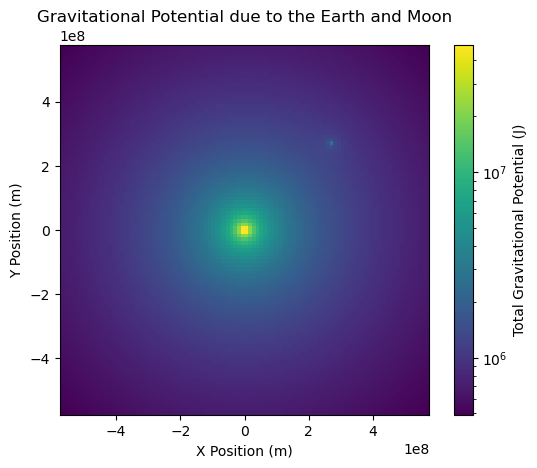

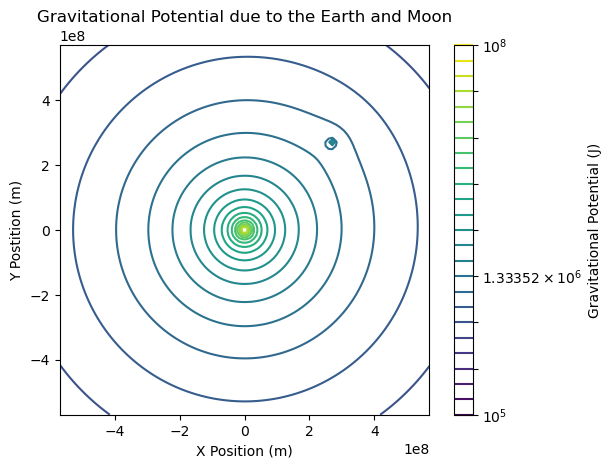

In [8]:
#Part 2: Gravitational potential of Earth Moon System
#for this section, the suffix 'mae' stands for moon and earth. 
#Will be using the same xgrid and ygrid, as that need not change.
moongrav = vphi(moonm, distancemoon/np.sqrt(2), distancemoon/np.sqrt(2), xgrid1,ygrid1)
#colormesh plot
figmae, axmae = plt.subplots()
colorsmae = axmae.pcolormesh(xgrid1,ygrid1,abs(moongrav+gravmesh), norm = 'log')
axmae.set_aspect('equal')
axmae.set_xlabel('X Position (m)')
axmae.set_ylabel('Y Position (m)')
cbarmae = figmae.colorbar(colorsmae)
cbarmae.set_label('Total Gravitational Potential (J)')
axmae.set_title('Gravitational Potential due to the Earth and Moon')
plt.savefig('grav pot moon and earth colormesh')

#contour plot
cfigmae, caxmae = plt.subplots()
levels = np.logspace(5,8,25)
ccolor=caxmae.contour(xgrid1,ygrid1,abs(moongrav+gravmesh),levels = levels, norm ='log')
caxmae.set_xlabel('X Position (m)')
caxmae.set_ylabel('Y Postition (m)')
ccbarmae=cfigmae.colorbar(ccolor)
ccbarmae.set_label('Gravitational Potential (J)')
caxmae.set_aspect('equal')
caxmae.set_title('Gravitational Potential due to the Earth and Moon')
plt.savefig('Grav pot moon and earth contour')

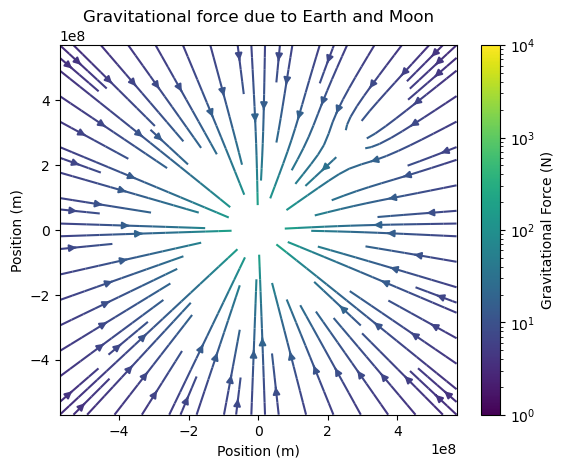

In [9]:
#Part 3: Gravitational Force Field of the Earth-Moon system
#Again, Using the same xgrid, ygrid
#Using the suffix f on this to represent force
import matplotlib.colors as colors
apollom = 5500 #kg
earthrad = 6378*10**4 #m
moonrad = 1737*10**4 #m
def Fg(M1,m2,xm,ym,x,y,rad):
    disvec = np.hypot(x-xm,y-ym)
    if disvec < rad:
        Fx = np.nan
        Fy = np.nan
        Fm = np.nan
        return Fx, Fy, Fm
    else:
        Fm = -(G*M1*m2)/(disvec**2) #Magnitude of F
        cos = (x-xm)/disvec
        sin = (y-ym)/disvec
        Fx = Fm*cos
        Fy = Fm*sin
        return Fx, Fy, Fm
        
vFg = np.vectorize(Fg)
Fex, Fey, Fem = vFg(earthm, apollom,0,0,xgrid1,ygrid1, earthrad)
Fmx, Fmy, Fmm = vFg(moonm, apollom, distancemoon/np.sqrt(2),distancemoon/np.sqrt(2), xgrid1,ygrid1, moonrad)
figf, axf = plt.subplots()
stream = axf.streamplot(xgrid1,ygrid1,Fex+ Fmx,Fey+Fmy, color = abs(Fmm + Fem), norm = colors.LogNorm(1,10**4))
cbarf = figf.colorbar(stream.lines)
axf.set_title('Gravitational force due to Earth and Moon')
axf.set_ylabel('Position (m)')
axf.set_xlabel('Position (m)')
cbarf.set_label('Gravitational Force (N)')
plt.savefig('grav force streamplot')

In [5]:
#Part 5: Altitude of the Saturn V Rocket
from scipy.integrate import quad
#defining variables:
m0 = 2.8*10**6 #kg
mf = 7.5*10**5 #kg
m = 1.3*10**4 #kg/s
ve = 2.4*10**3 #m/s
g = 9.81 #m/s^2
#burn time for the rocket
def T(m0,mf,m):
    return (m0-mf)/m

burntime= T(m0,mf,m)
print(f"The burn time for the Saturn V Rocket is {burntime} seconds.")

#Change in velocity
def dv(t,m0,mf,m,ve,g):
    mt = m0 - m*t
    if mt < mf:
        dv = 0
        return dv
    else:
        dv = ve*np.log(m0/mt)-g*t
        return dv

n = 50
tt = np.linspace(0,burntime,n)
vdv = np.vectorize(dv)
def vdv1(t):
    return vdv(t,m0,mf,m,ve,g)
velo = vdv(tt,m0,mf,m,ve,g)
alt = quad(vdv1, 0, burntime)
print(f"The final altitude of the Saturn V rocket is {alt[0]} meters.")



The burn time for the Saturn V Rocket is 157.69230769230768 seconds.
The final altitude of the Saturn V rocket is 74093.98013366401 meters.
